In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r"C:\\Users\\Haripriya Mudumba\\Desktop\\Workshop\\haripriya\\wineQualityReds.csv",index_col=False)

In [5]:
X = data.iloc[:, :12].values
y = data.iloc[:, 12].values

In [6]:
sc = StandardScaler()

In [7]:
data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
Z = sc.fit_transform(X)

In [9]:
data1 = data.drop(columns = "quality")

## PCA from scratch¶

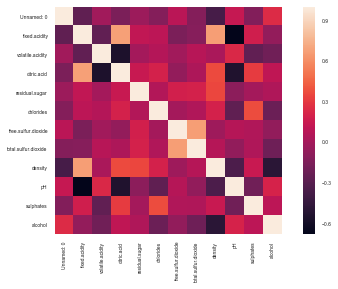

In [10]:
# Estimate the covariance matrix

P = np.dot(Z.T, Z) / data.shape[0]

sns.set(font_scale=0.5)
hm = sns.heatmap(P, 
            cbar=True,
            square=True,
            yticklabels=data1.columns,
            xticklabels=data1.columns)

plt.tight_layout()

plt.show()

sns.reset_orig()

In [11]:
# calculate eigen values

eigen_vals, eigen_vecs = np.linalg.eigh(P)

print('\nEigenvalues: \n%s' % eigen_vals)


Eigenvalues: 
[0.05918753 0.17586068 0.32108175 0.42111997 0.56297199 0.62379443
 0.87699684 0.96430043 1.21509636 1.6096374  1.9545513  3.21540133]


In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

In [13]:
eigen_pairs

[(3.2154013312569147,
  array([-0.22626362,  0.47745619, -0.21192285,  0.43941372,  0.14110947,
          0.21124664, -0.03763606,  0.03651861,  0.40657634, -0.42031013,
          0.23355672, -0.13799957])),
 (1.9545512992699308,
  array([ 0.16365465,  0.13139058, -0.32458044,  0.20332709, -0.23725045,
         -0.13558179, -0.46083271, -0.53498091, -0.23715487, -0.04342567,
          0.0688096 ,  0.41611868])),
 (1.609637396259248,
  array([ 0.25308032, -0.09115348, -0.40647428,  0.24601504,  0.16912832,
         -0.04753082,  0.48785619,  0.37193546, -0.26880101, -0.00303612,
          0.25716888,  0.39534088])),
 (1.2150963556984449,
  array([-0.06166335, -0.23852838,  0.05699217, -0.07429101, -0.38166497,
          0.64779898, -0.03627557, -0.02415848, -0.19200216,  0.01368546,
          0.56264729, -0.09848494])),
 (0.9643004327900924,
  array([ 0.19625891, -0.06337644,  0.25850359, -0.06011073,  0.7287418 ,
          0.30819594, -0.15317813, -0.23862587,  0.16268619,  0.18367802,

In [14]:
### next step is to find the PCs that explain maximum variance, this can be done using a scree plot that calculate
## the variance explained by each Eigen value.



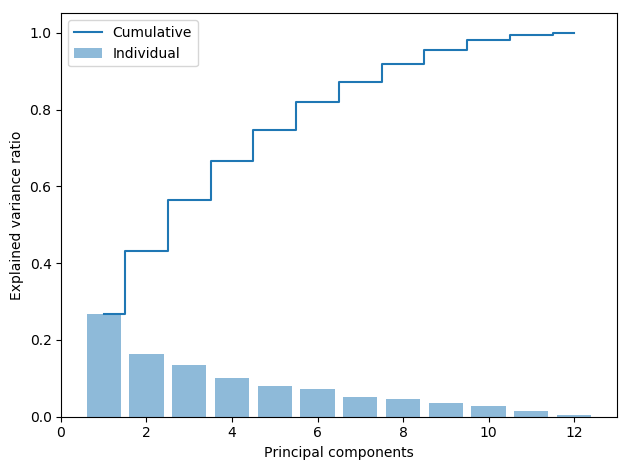

In [15]:
import matplotlib.pyplot as plt

tot = sum(np.abs(eigen_vals))
var_exp = [(i / tot) for i in sorted(np.abs(eigen_vals), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha=0.5, align='center',
        label='Individual')
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, where='mid',
         label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [16]:
### we can see that variance started increasing at 2nd component.

In [17]:
# so we pick two PCs and form the projection matrix W.

In [18]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Peojection matrix W:\n', W)

Peojection matrix W:
 [[-0.22626362  0.16365465]
 [ 0.47745619  0.13139058]
 [-0.21192285 -0.32458044]
 [ 0.43941372  0.20332709]
 [ 0.14110947 -0.23725045]
 [ 0.21124664 -0.13558179]
 [-0.03763606 -0.46083271]
 [ 0.03651861 -0.53498091]
 [ 0.40657634 -0.23715487]
 [-0.42031013 -0.04342567]
 [ 0.23355672  0.0688096 ]
 [-0.13799957  0.41611868]]


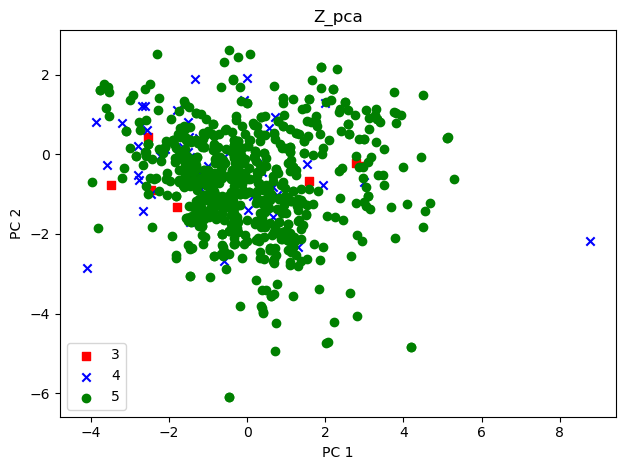

In [19]:
# find the compressed dataset and project in a 2D space
Z_pca = Z.dot(W)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(Z_pca[y==l, 0], 
                Z_pca[y==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_pca')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [21]:
X

array([[-1.73096794, -0.52835961,  0.96187667, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-1.72880152, -0.29854743,  1.96744245, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-1.7266351 , -0.29854743,  1.29706527, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [ 1.7266351 , -1.1603431 , -0.09955388, ...,  0.70550789,
         0.54204194,  0.54162988],
       [ 1.72880152, -1.39015528,  0.65462046, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [ 1.73096794, -1.33270223, -1.21684919, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [22]:
pca = decomposition.PCA(n_components= 7)
pca.fit(X)
pca.transform(X)

array([[-1.10503704,  1.01738783, -2.23928527, ..., -0.27896747,
         1.55757089, -0.25757413],
       [-0.31147729,  2.23038887, -1.10113815, ..., -0.18677232,
         0.64264773,  1.51369661],
       [-0.27670935,  1.30491076, -1.49627925, ..., -0.26925304,
         0.91764327,  0.93835103],
       ...,
       [-1.83311006,  0.02614818,  1.422036  , ...,  0.38781634,
        -0.73639299, -0.75308498],
       [-2.58477688,  0.79211269,  0.95249609, ...,  0.25681873,
        -0.65716789, -1.00202224],
       [-0.87709224, -0.93222218,  1.89664547, ...,  0.61138866,
        -0.65064108, -1.23110205]])

In [152]:
explained_variance = pca.explained_variance_ratio_

In [153]:
explained_variance

array([0.26795011, 0.16287927, 0.13413645, 0.10125803, 0.08035837,
       0.07308307, 0.05198287])

In [154]:
var = np.cumsum((pca.explained_variance_ratio_))

In [155]:
var

array([0.26795011, 0.43082939, 0.56496584, 0.66622387, 0.74658223,
       0.8196653 , 0.87164817])

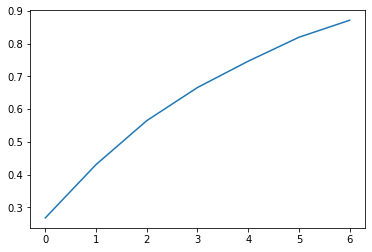

In [156]:
#scree plot
plt.plot(var)

In [88]:
data1 =data.drop(columns = "quality")

In [144]:
## features explained by the components

print("Explained variance by component: %s" % pca.explained_variance_ratio_)
print(pd.DataFrame(pca.components_,columns=data1.columns))

Explained variance by component: [0.26795011 0.16287927 0.13413645 0.10125803 0.08035837]
   Unnamed: 0  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0   -0.226264       0.477456         -0.211923     0.439414        0.141109   
1   -0.163655      -0.131391          0.324580    -0.203327        0.237250   
2    0.253080      -0.091153         -0.406474     0.246015        0.169128   
3   -0.061663      -0.238528          0.056992    -0.074291       -0.381665   
4    0.196259      -0.063376          0.258504    -0.060111        0.728742   

   chlorides  free.sulfur.dioxide  total.sulfur.dioxide   density        pH  \
0   0.211247            -0.037636              0.036519  0.406576 -0.420310   
1   0.135582             0.460833              0.534981  0.237155  0.043426   
2  -0.047531             0.487856              0.371935 -0.268801 -0.003036   
3   0.647799            -0.036276             -0.024158 -0.192002  0.013685   
4   0.308196            -0.153178       

In [ ]:
#fixed.acidity,volatile acidity,citric.acid,reisual sugar,chlorides,density,ph,sulphates------- acidity

In [ ]:
#alcohol,free sulfur dioxide

In [ ]:
#